# This Notebook illustrates the setling time of the TDM signals.
### L. Ravera @IRAP
### January 27, 2022

In [70]:
import numpy as np
import matplotlib.pyplot as plt

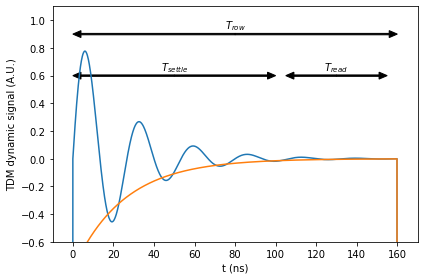

In [71]:
Trow=160e-9
npts=2**10
value1=-0.8
value2=0
value3=-0.1

def sig_oscillating(Trow, npts):
    # Computing a signal with oscillations
    t=np.arange(npts)*Trow/npts
    nper=6 # number of oscillations during Trow
    return np.sin(2*np.pi*t*nper/Trow)*np.exp(-t*4e7)

def sig_slow(Trow, npts):
    # Computing a signal with oscillations
    t=np.arange(npts)*Trow/npts
    return 1-np.exp(-t*4e7)

t=np.arange(3*npts)*Trow/npts-Trow
sig1=np.ones(3*npts)*-10
#sig1[0:npts]=value1+sig_oscillating(Trow, npts)
sig1[npts:npts*2]=value2+sig_oscillating(Trow, npts)
#sig1[npts*2:npts*3]=value3-sig_oscillating(Trow, npts)

sig2=np.ones(3*npts)*-10
#sig2[0:npts]=value1+sig_slow(Trow, npts)
sig2[npts:npts*2]=value1+(value2-value1)*sig_slow(Trow, npts)
#sig2[npts*2:npts*3]=value2+(value3-value2)*sig_slow(Trow, npts)

fig=plt.figure(1,(6,4))
ax1=fig.add_subplot(1,1,1)
ax1.plot(t*1e9, sig1)
ax1.plot(t*1e9, sig2)
ax1.set_xlabel(r't (ns)')
ax1.set_ylabel(r'TDM dynamic signal (A.U.)')
ax1.set_xlim(-10, 170)
ax1.set_ylim(-0.6, 1.1)
ax1.arrow(80,0.9,80,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.arrow(80,0.9,-80,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.text(80,0.94, r'$T_{row}$', color='k', horizontalalignment='center')
ax1.arrow(50,0.6,50,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.arrow(50,0.6,-50,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.text(50,0.64, r'$T_{settle}$', color='k', horizontalalignment='center')
ax1.arrow(130,0.6,25,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.arrow(130,0.6,-25,0,length_includes_head=True, head_width=0.05, head_length=4, width=0.01, fc='k', ec='k')
ax1.text(130,0.64, r'$T_{read}$', color='k', horizontalalignment='center')
fig.tight_layout()
plt.savefig('settling_time.png', dpi=300, bbox_inches='tight')

